In [209]:
import pandas as pd

df = pd.read_csv("text_emotion.csv")
df.head()


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [211]:
df = df[["sentiment","content"]]

In [212]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [213]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [214]:
 X = corpus
 y = targets

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = df.content

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
targets = encoder.fit_transform(df.sentiment)
print(targets)

[ 2 10 10 ...  7  5  7]


In [223]:
labels = encoder.inverse_transform(targets)
lab = np.unique(labels)
print(labels)
print(lab)

['empty' 'sadness' 'sadness' ... 'love' 'happiness' 'love']
['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X_vc = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vc, y, test_size=0.25, random_state=42)

X_train

<30000x48212 sparse matrix of type '<class 'numpy.int64'>'
	with 357390 stored elements in Compressed Sparse Row format>

In [10]:
import numpy as np
print("x_train :", np.size(X_train))
print("x_test :", np.size(X_test))
print("ratio :", round(np.size(X_test)/(np.size(X_train)+np.size(X_test))*100))

x_train : 357390
x_test : 118556
ratio : 25


In [11]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.3342


/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import f1_score

y_pred = classifier.predict(X_test)
f1_score = f1_score(y_test, y_pred, average = None)
df_f1_score = pd.DataFrame([f1_score], index = ['f1_score'], columns=['happiness','sadness','anger','worry','love','surprise','fun','relief'
                                     ,'empty','enthusiasm','boredom','hate','neutral'])
df_f1_score

,happiness,sadness,anger,worry,love,surprise,fun,relief,empty,enthusiasm,boredom,hate,neutral
f1_score,0.0,0.0,0.0,0.009091,0.061588,0.324411,0.255403,0.414374,0.430748,0.078995,0.296092,0.117197,0.360136


In [13]:
print(X_train.shape)
print(X_test.shape)

(30000, 48212)
(10000, 48212)


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(1, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 48213     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                26        
Total params: 48,239
Trainable params: 48,239
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_test = X_test.sorted_indices()
X_train = X_train.sorted_indices()

In [17]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.4672
Testing Accuracy:  0.2892


In [20]:
from tensorflow.keras.backend import clear_session
clear_session()

In [21]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [22]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5011
Testing Accuracy:  0.2800


In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

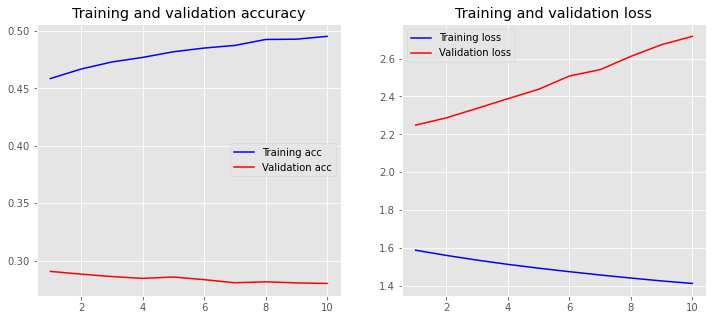

In [24]:
plot_history(history)

## epochs = 20

In [25]:
from tensorflow.keras.backend import clear_session
clear_session()

In [26]:
from tensorflow.keras.backend import clear_session
clear_session()

history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5858
Testing Accuracy:  0.2631


# epochs = 20 et layers.Dense(10)

In [27]:
from tensorflow.keras.backend import clear_session
clear_session()

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9752
Testing Accuracy:  0.2482


# epochs = 10 et layers.Dense(20)

In [28]:
from tensorflow.keras.backend import clear_session
clear_session()

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9692
Testing Accuracy:  0.2718


# epochs = 10 et layers.Dense(100) + ajouter une couche cahée à 100 neurones

In [29]:
from tensorflow.keras.backend import clear_session
clear_session()

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9928
Testing Accuracy:  0.2687


## optimizer = "sgd",epochs = 10 et layers.Dense(100) + ajouter une couche cahée à 100 neurones

In [30]:
from tensorflow.keras.backend import clear_session
clear_session()

input_dim = X_train.shape[1]  # Number of features

model = keras.Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
#model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5912
Testing Accuracy:  0.3364


# Word Embeddings

In [110]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df.sentiment)
print(y.shape)
y

(40000,)


array([ 2, 10, 10, ...,  7,  5,  7])

In [111]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y = y.reshape((40000, 1))
encoder.fit_transform(y)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
X = corpus

print(type(X))
print(X.shape)

<class 'pandas.core.series.Series'>
(40000,)


In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tokenizer = Tokenizer(num_words=5000)
X_token = tokenizer.fit_on_texts(X)
print(type(X_token))

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[10])
print(X_train_token[10])

<class 'NoneType'>
cant fall asleep
[30, 20, 188, 27, 626]


In [114]:
print('vocab_size = ', vocab_size)

vocab_size =  48998


In [115]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#  maxlen paramètre pour spécifier la longueur des séquences
maxlen = 100
# tiliser pad_sequence()qui remplit simplement la séquence de mots avec des zéros
X_train = pad_sequences(X_train_token, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='post', maxlen=maxlen)

print(X_train[0, :])

[2246  314   73  893    5 1171 1819   13   61   78    8   60   23  107
    2   41    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


# Keras Embedding Layer

## layers.Flatten()

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 100, 50)           2449900   
_________________________________________________________________
flatten_4 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 5001      
_________________________________________________________________
dense_56 (Dense)             (None, 13)                26        
Total params: 2,454,927
Trainable params: 2,454,927
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.layers

Epoch 1/10
60/60 [==============================] - 6s 84ms/step - loss: 2.5552 - accuracy: 0.1841 - val_loss: 2.5274 - val_accuracy: 0.2268
Epoch 2/10
60/60 [==============================] - 5s 82ms/step - loss: 2.5186 - accuracy: 0.2227 - val_loss: 2.4932 - val_accuracy: 0.2285
Epoch 3/10
60/60 [==============================] - 4s 71ms/step - loss: 2.4852 - accuracy: 0.2230 - val_loss: 2.4623 - val_accuracy: 0.2282
Epoch 4/10
60/60 [==============================] - 5s 81ms/step - loss: 2.4548 - accuracy: 0.2165 - val_loss: 2.4344 - val_accuracy: 0.2271
Epoch 5/10
60/60 [==============================] - 6s 102ms/step - loss: 2.4262 - accuracy: 0.2229 - val_loss: 2.4092 - val_accuracy: 0.2240
Epoch 6/10
60/60 [==============================] - 6s 93ms/step - loss: 2.4026 - accuracy: 0.2165 - val_loss: 2.3865 - val_accuracy: 0.2221
Epoch 7/10
60/60 [==============================] - 6s 93ms/step - loss: 2.3810 - accuracy: 0.2166 - val_loss: 2.3661 - val_accuracy: 0.2216
Epoch 8/10
6

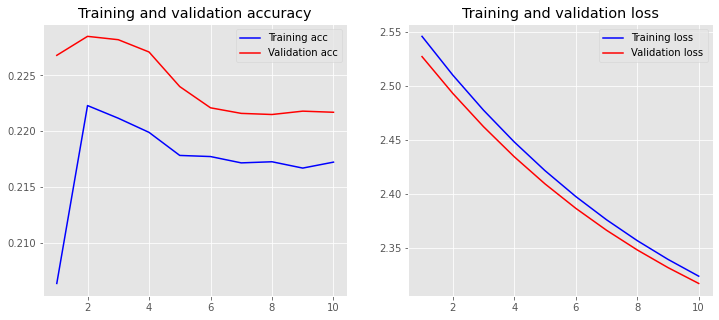

In [76]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [81]:
print('X_test.shape = ', X_test.shape)
print('X_test[0].shape = ', X_test[0].shape)
print('np.array([X_test[0]]).shape = ', np.array([X_test[0]]).shape)
y_pred = model.predict(X_test)
y_pred

X_test.shape =  (10000, 100)
X_test[0].shape =  (100,)
np.array([X_test[0]]).shape =  (1, 100)


array([[0.05055471, 0.05104985, 0.05535051, ..., 0.09320372, 0.06587829,
        0.135648  ],
       [0.05096183, 0.05079304, 0.0560801 , ..., 0.09385605, 0.06585631,
        0.13644622],
       [0.05073549, 0.05093624, 0.05567368, ..., 0.09349361, 0.0658692 ,
        0.13600305],
       ...,
       [0.05087405, 0.05084871, 0.05592224, ..., 0.09371554, 0.06586152,
        0.13627452],
       [0.05095831, 0.05079529, 0.05607376, ..., 0.09385041, 0.06585653,
        0.13643934],
       [0.0505911 , 0.05102704, 0.05541546, ..., 0.09326211, 0.06587656,
        0.13571954]], dtype=float32)

## layers.GlobalMaxPool1D()

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 100, 50)           2449900   
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 50)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_64 (Dense)             (None, 13)                1313      
Total params: 2,456,313
Trainable params: 2,456,313
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.4168
Testing Accuracy:  0.3495


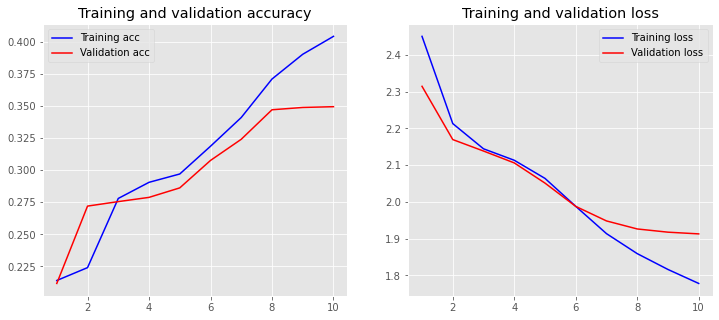

In [117]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [118]:
model.layers

In [119]:
print('X_test.shape = ', X_test.shape)
print('X_test[0].shape = ', X_test[0].shape)
print('np.array([X_test[0]]).shape = ', np.array([X_test[0]]).shape)
y_pred = model.predict(X_test)
y_pred

X_test.shape =  (10000, 100)
X_test[0].shape =  (100,)
np.array([X_test[0]]).shape =  (1, 100)


array([[0.00130552, 0.00151433, 0.0104253 , ..., 0.00363904, 0.03541033,
        0.01852804],
       [0.00332446, 0.00542609, 0.02619208, ..., 0.13292429, 0.06737886,
        0.31922764],
       [0.00254529, 0.00379971, 0.01699072, ..., 0.05975043, 0.07909209,
        0.22281513],
       ...,
       [0.00291233, 0.00541714, 0.01605283, ..., 0.3421943 , 0.04593961,
        0.3743333 ],
       [0.00126104, 0.0028419 , 0.00960667, ..., 0.15504137, 0.06514012,
        0.3258909 ],
       [0.00798109, 0.00943307, 0.04592614, ..., 0.05488676, 0.06399947,
        0.1003805 ]], dtype=float32)

In [120]:
def predict_emo(model, text):
    
    tokenizer = Tokenizer(num_words=5000)
    X_token = tokenizer.fit_on_texts(text)
    text_token = tokenizer.texts_to_sequences(text)
    vocab_size = len(tokenizer.word_index) + 1 
    x_text = pad_sequences(text_token, padding='post', maxlen=maxlen)
    y_pred = model.predict(x_text)
    emo = np.argmax(y_pred[0])
    return emo

text = "I am very happy"
predict_emo(model, text)

8

# Faite une fonction type "classification report" prenant en entré un modéle/expérience donnée et qui vous retourne les résultats de classification

In [121]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from time import time


def classification_report(model):
    start = time()
    history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
    
    loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=False)
    loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)
    y_pred1 = model.predict(X_test)
    y_pred = np.argmax(y_pred1, axis=1)

    # f1, precision, and recall scores
    precision = precision_score(y_test, y_pred , average="macro")
    recall = recall_score(y_test, y_pred , average="macro")
    res = [accuracy_train, accuracy_test, precision, recall]
    df = pd.DataFrame([res], index = ['metrics'], columns=['accuracy_train', 'accuracy_test', 'precision', 'recall'])#
    #print(df)
    f1_score_classes = f1_score(y_test, y_pred , average=None)
    #print(f1_score)
    df2 = pd.DataFrame([f1_score_classes], index = ['metrics'], columns=['f1_happiness','f1_sadness','f1_anger','f1_worry','f1_love'
                                                                         ,'f1_surprise','f1_fun','f1_relief','f1_empty','f1_enthusiasm'
                                                                         ,'f1_boredom','f1_hate','f1_neutral'])
    DF = pd.concat([df,df2], axis=1)
    plot_history(history)
    end = time()
    Time = abs(start - end)
    print('Time = {} secondes'.format(Time))
    return DF

# Models
## Flatten() 

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 50
# model1 = Flatten() + layers.Dense = 1 + optimizer = "sgd"
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.Flatten())
model1.add(layers.Dense(1, activation='relu'))
model1.add(layers.Dense(13, activation='softmax'))
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model2 = Flatten() + layers.Dense = 100 + optimizer = "adam"
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.Flatten())
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(13, activation='softmax'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model3 = Flatten() + layers.Dense = 100 + ajouter une couche cahée de layers.Dense = 100 + optimizer = "adam"
model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model3.add(layers.Flatten())
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(13, activation='softmax'))
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 70.95932579040527 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.215167,0.2183,0.016792,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358368,0.0,0.0,0.0,0.0


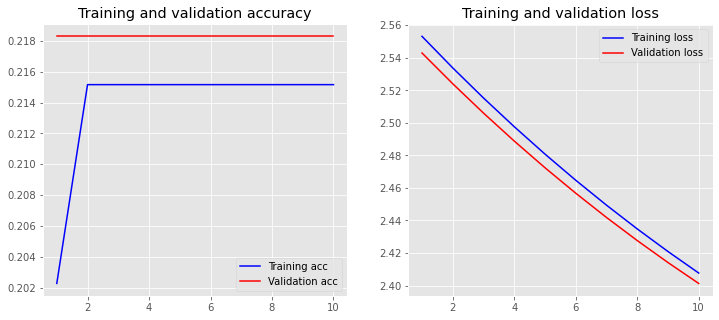

In [45]:
classification_report(model1)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 186.465918302536 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.552367,0.331,0.276927,0.152543,0.0,0.0,0.0,0.0,0.00463,0.316927,0.040462,0.388283,0.436553,0.004587,0.256433,0.018797,0.363565


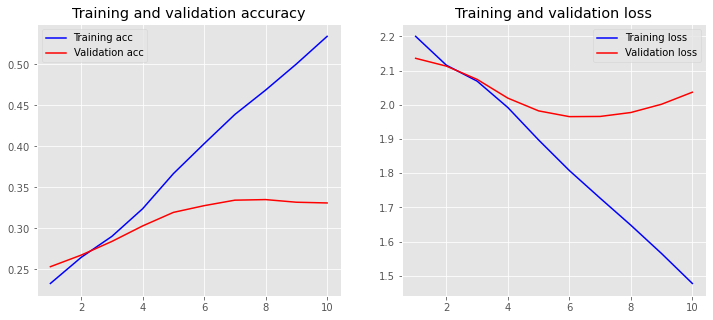

In [46]:
classification_report(model2)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 186.49390625953674 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.6924,0.3014,0.159364,0.148394,0.0,0.0,0.0,0.0,0.025,0.294004,0.129808,0.348063,0.406193,0.008639,0.274589,0.022599,0.327424


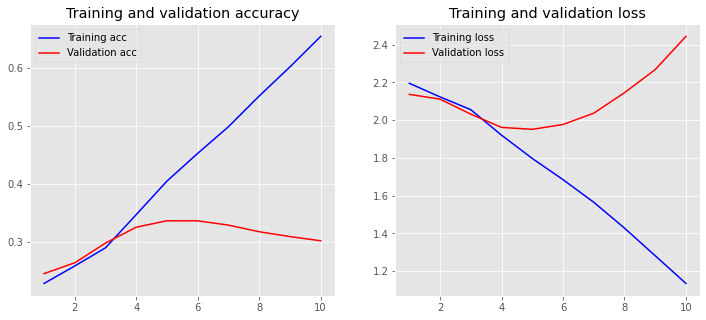

In [47]:
classification_report(model3)

## layers.GlobalMaxPool1D()

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 50

# model4 = GlobalMaxPool1D() + layers.Dense = 1 + optimizer = "sgd"
model4 = Sequential()
model4.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model4.add(layers.GlobalMaxPool1D())
model4.add(layers.Dense(1, activation='relu'))
model4.add(layers.Dense(13, activation='softmax'))
model4.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model5 = GlobalMaxPool1D() + layers.Dense = 100 + optimizer = "adam"
model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dense(13, activation='softmax'))
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# model6 = GlobalMaxPool1D() + layers.Dense = 100 + ajouter une couche caché + optimizer = "adam"
model6 = Sequential()
model6.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model6.add(layers.GlobalMaxPool1D())
model6.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dense(13, activation='softmax'))
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 107.24607467651367 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.215167,0.2183,0.016792,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358368,0.0,0.0,0.0,0.0


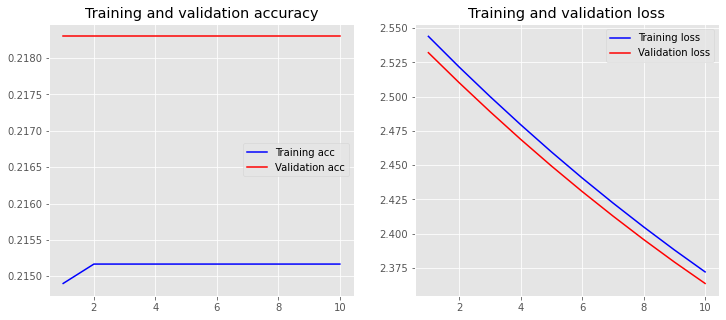

In [49]:
classification_report(model4)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 69.67884349822998 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.430867,0.349,0.145558,0.158793,0.0,0.0,0.0,0.0,0.0,0.358974,0.0,0.407273,0.453136,0.0,0.241266,0.0,0.391885


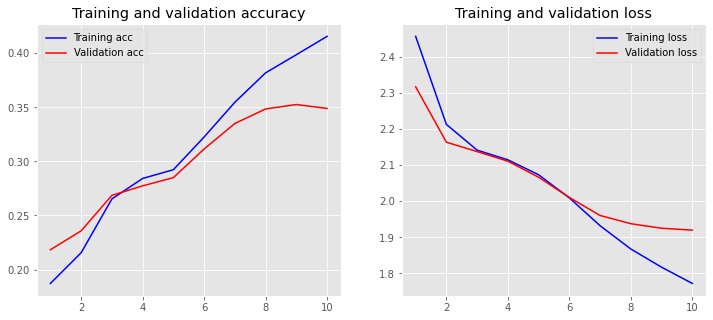

In [123]:
classification_report(model5)

# Fontion pour predir l'emotion d'un text
## Finction n°1

In [225]:
labels = encoder.inverse_transform(targets)
lab = np.unique(labels)
print("labels =",lab)


labels = ['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [238]:
def predict_emo(model, text):
    tokenizer = Tokenizer(num_words=500)
    tokenizer.fit_on_texts(text)
    text_token = tokenizer.texts_to_sequences(text)
    x_text = pad_sequences(text_token, padding='post', maxlen=maxlen)
    y_pred = model.predict(x_text)
    emo = np.argmax(y_pred[0])
    liste_emotion = ['anger','boredom','empty','enthusiasm','fun','happiness','hate','love','neutral','relief','sadness','surprise','worry']
    emotion = liste_emotion[emo]
    return emotion

text = "I am very happy"
#text = "i am in a mad"
#text = "i am in a sad"
#text = "i love you"
predict_emo(model5, text)

'neutral'

## Finction n°2

In [239]:
def predict(model, text):
    index_words = []
    text = text.lower()
    liste = text.split()
    for word in liste:
        a = tokenizer.word_index[word]
        index_words.append(a) 
    max_index = max(index_words)    
    y_pred = model.predict([max_index])
    #print('y_pred[0] = ', y_pred)
    emo = np.argmax(y_pred[0])
    #print('emo = ', emo)
    liste_emotion = ['anger','boredom','empty','enthusiasm','fun','happiness','hate','love','neutral','relief','sadness','surprise','worry']
    emotion = liste_emotion[emo]
    return "text = {}, index_words = {}, max_index = {}, Emotion = {}".format(text,index_words,max_index,emotion)

text = "I am very happy"
#text = "i am in a mad"
#text = "i am in a sad"
#text = "i love you"
predict(model5, text)

'text = i am very happy, index_words = [1, 63, 122, 49], max_index = 122, Emotion = happiness'

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 134.76043677330017 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.507767,0.3333,0.187259,0.16007,0.0,0.0,0.0,0.0,0.0,0.347853,0.090141,0.420648,0.410792,0.0,0.253768,0.0,0.381141


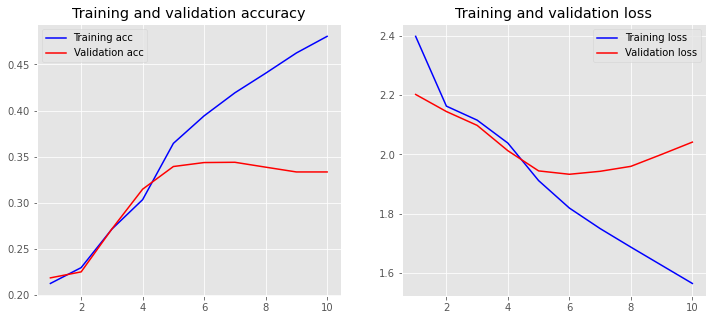

In [51]:
classification_report(model6)

Le model le plus performant entres les 6 models c'est le model5 avec GlobalMaxPool1D() sans couche cahé avec layers.Dense=100, optimizer = "adam" on essaye d'augmenter le nombre de neurones

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 123.85467338562012 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.472067,0.349,0.14132,0.16408,0.0,0.0,0.0,0.0,0.0,0.360954,0.0,0.421597,0.432879,0.0,0.319215,0.0,0.390665


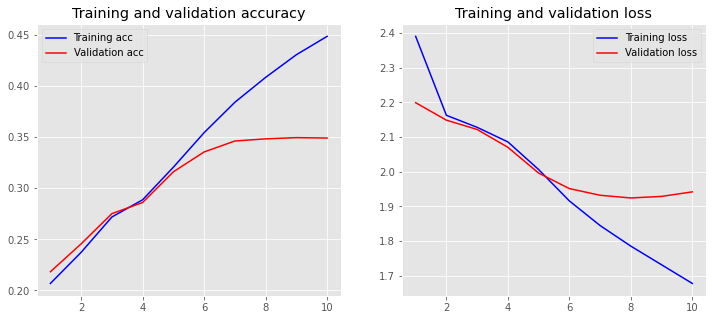

In [52]:
# model5 = GlobalMaxPool1D() + layers.Dense = 100 + optimizer = "adam"
model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(300, activation='relu'))
model5.add(layers.Dense(13, activation='softmax'))
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classification_report(model5)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 130.81752634048462 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.466267,0.3459,0.135745,0.162549,0.0,0.0,0.0,0.0,0.0,0.352603,0.0,0.422418,0.429305,0.0,0.301757,0.0,0.388835


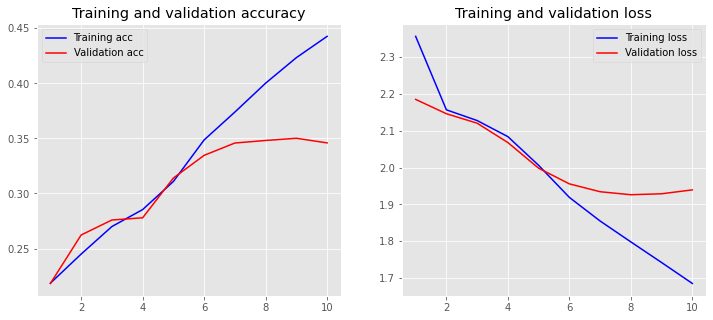

In [53]:
# model5 = GlobalMaxPool1D() + layers.Dense = 100 + optimizer = "adam"
model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(400, activation='relu'))
model5.add(layers.Dense(13, activation='softmax'))
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classification_report(model5)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 127.2261803150177 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.4727,0.3495,0.184269,0.165541,0.0,0.0,0.0,0.0,0.0,0.347415,0.088643,0.424612,0.43503,0.0,0.296225,0.0,0.397051


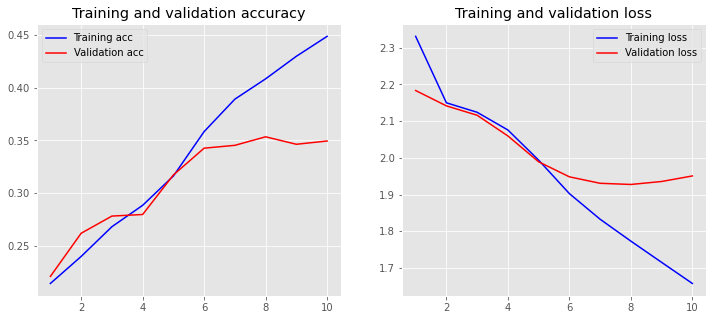

In [54]:
# model5 = GlobalMaxPool1D() + layers.Dense = 600 + optimizer = "adam"

model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(600, activation='relu'))
model5.add(layers.Dense(13, activation='softmax'))
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

classification_report(model5)

Le model le plus performant est celui avec layers.Dense = 100, optimizer = "adam", GlobalMaxPool1D() et sans couche caché

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 74.8453254699707 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.4432,0.3493,0.147887,0.160381,0.0,0.0,0.0,0.0,0.0,0.367051,0.0,0.434882,0.435833,0.0,0.207944,0.0,0.406475


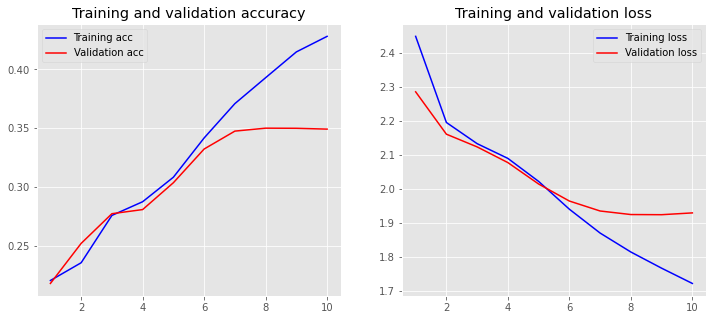

In [61]:
model5 = Sequential()
model5.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model5.add(layers.GlobalMaxPool1D())
model5.add(layers.Dense(140, activation='relu'))
#model5.add(layers.Dropout(0.2))
#model5.add(layers.Dense(20, activation='relu'))
model5.add(layers.Dense(13, activation='softmax'))
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model5)

## Quelle doit être le format de donnée en entrée de la couche "Embedding" ?

input_dim : estun entier(Taille du vocabulaire = ocab_size)

## Expliquer ce que fait et le rôle de la fonction pas_sequence ? Quelle sont les paramètres important de cette fonction ?

pas_sequence : remplit la séquence de mots avec des zéros
le parametre le plus important c'est "maxlen" pour spécifier la longueur des séquences

## Expliquer ce que fait et le rôle de la couche GlobalMaxPool1d ? Quelle sont les paramètre important ? Quelle alternatives existe il ?

# Utilisation des incorporations de mots pré-entraînées (Pretrained Word Embeddings)

## utilisation de GloVe du groupe Stanford NLP

In [62]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [63]:
# pour recuperer le fichier "glove.6B.50d.txt" il faut le télécharger de "https://www.kaggle.com/anindya2906/glove6b?select=glove.6B.50d.txt"
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'data_2/glove_word_embeddings/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [64]:
#combien de vecteurs d'incorporation sont différents de zéro
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.45869219151802115

# utilisation du GlobalMaxPool1Dcalque

In [65]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 50)           2449900   
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 50)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_41 (Dense)             (None, 13)                1313      
Total params: 2,456,313
Trainable params: 6,413
Non-trainable params: 2,449,900
_________________________________________________________________


Training Accuracy: 0.2981
Testing Accuracy:  0.2893


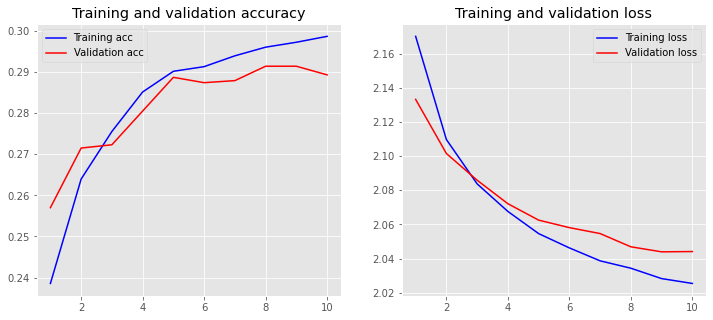

In [66]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=500)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 32.96546506881714 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.303167,0.2939,0.115246,0.122959,0.0,0.0,0.0,0.0,0.0,0.230004,0.0,0.265029,0.405513,0.0,0.087524,0.0,0.368405


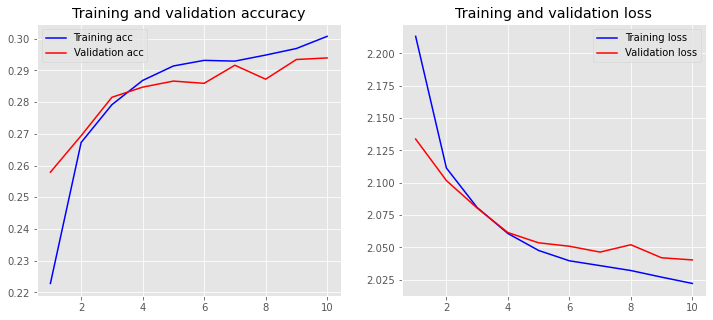

In [166]:
model7 = Sequential()
model7.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(300, activation='relu'))
model7.add(layers.Dense(13, activation='softmax'))
model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model7)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 35.27449941635132 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.3045,0.2923,0.120989,0.130008,0.0,0.0,0.0,0.0,0.0,0.26645,0.0,0.306802,0.410805,0.0,0.032234,0.0,0.362368


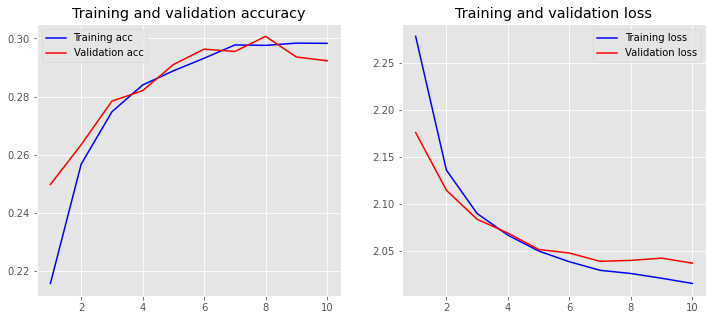

In [167]:
model7 = Sequential()
model7.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(300, activation='relu'))
model7.add(layers.Dense(100, activation='relu'))
model7.add(layers.Dense(30, activation='relu'))
model7.add(layers.Dense(13, activation='softmax'))
model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model7)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 34.822885513305664 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.301833,0.2954,0.115513,0.129068,0.0,0.0,0.0,0.0,0.0,0.289855,0.0,0.232036,0.412871,0.0,0.192469,0.0,0.350981


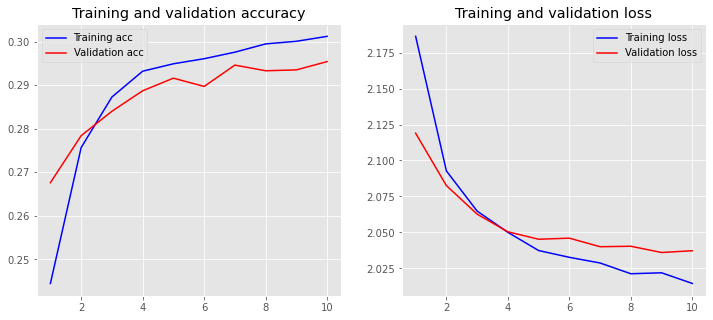

In [171]:
model7 = Sequential()
model7.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(450, activation='relu'))
model7.add(layers.Dense(13, activation='softmax'))
model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model7)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 43.73432230949402 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.311167,0.2958,0.187213,0.13185,0.0,0.0,0.0,0.0,0.004739,0.253651,0.0,0.309328,0.412922,0.0,0.143101,0.0,0.354833


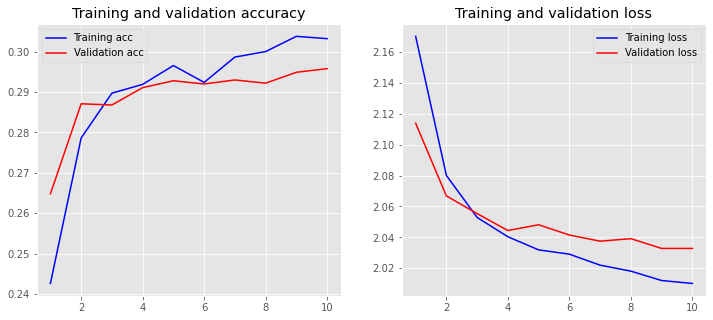

In [185]:
model7 = Sequential()
model7.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model7.add(layers.GlobalMaxPool1D())
model7.add(layers.Dense(1000, activation='relu'))
model7.add(layers.Dense(13, activation='softmax'))
model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model7)

# utilisation de trainable=True

In [67]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 100, 50)           2449900   
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 50)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_43 (Dense)             (None, 13)                1313      
Total params: 2,456,313
Trainable params: 2,456,313
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.3541
Testing Accuracy:  0.3153


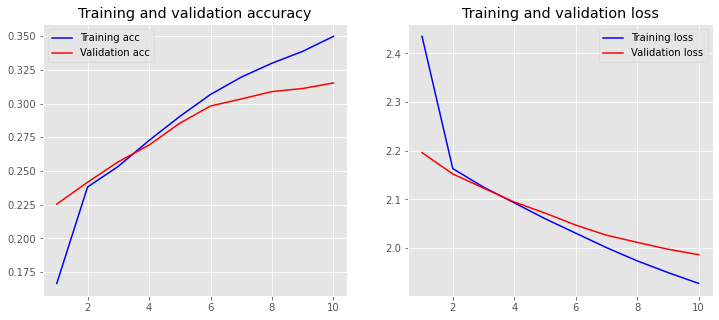

In [68]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 75.35676836967468 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.361633,0.3295,0.187631,0.151528,0.0,0.0,0.0,0.0,0.0,0.354556,0.035088,0.377289,0.410627,0.0,0.163164,0.0,0.397011


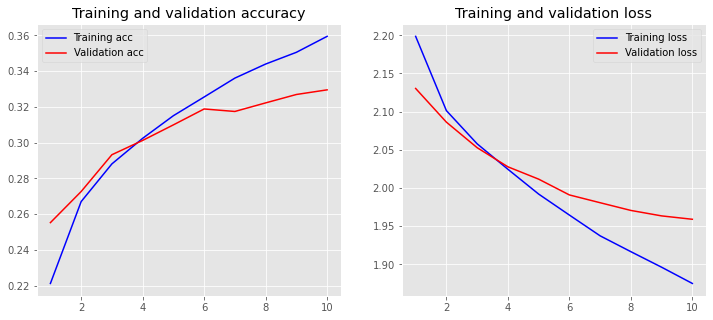

In [70]:
model8 = Sequential()
model8.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model8.add(layers.GlobalMaxPool1D())
model8.add(layers.Dense(300, activation='relu'))
model8.add(layers.Dense(13, activation='softmax'))
model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model8)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 79.92158079147339 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.376933,0.3302,0.149079,0.149969,0.0,0.0,0.0,0.0,0.00464,0.315631,0.005865,0.401264,0.429586,0.0,0.175276,0.0,0.387802


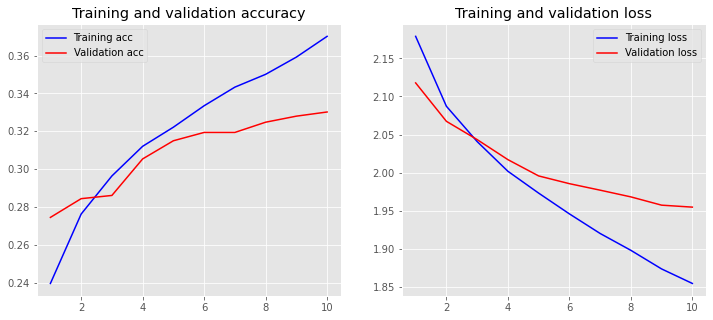

In [71]:
model8 = Sequential()
model8.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model8.add(layers.GlobalMaxPool1D())
model8.add(layers.Dense(300, activation='relu'))
model8.add(layers.Dense(100, activation='relu'))
model8.add(layers.Dense(13, activation='softmax'))
model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model8)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 77.7315571308136 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.375967,0.3281,0.147899,0.153173,0.0,0.0,0.0,0.0,0.0,0.330737,0.028409,0.405587,0.420974,0.0,0.224198,0.0,0.375966


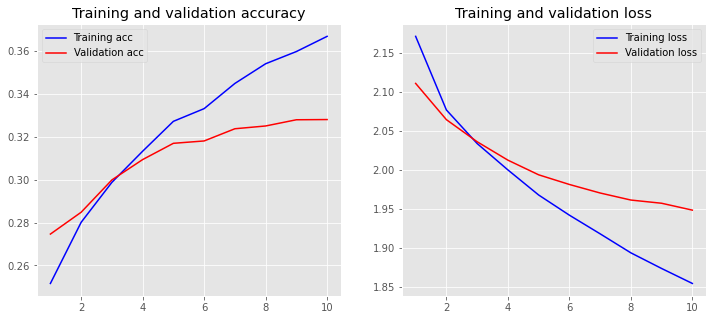

In [72]:
model8 = Sequential()
model8.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model8.add(layers.GlobalMaxPool1D())
model8.add(layers.Dense(600, activation='relu'))
model8.add(layers.Dense(13, activation='softmax'))
model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model8)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 87.43163514137268 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.377433,0.3256,0.152675,0.153758,0.0,0.0,0.0,0.0,0.0,0.316981,0.028902,0.407204,0.427681,0.0,0.264443,0.0,0.349273


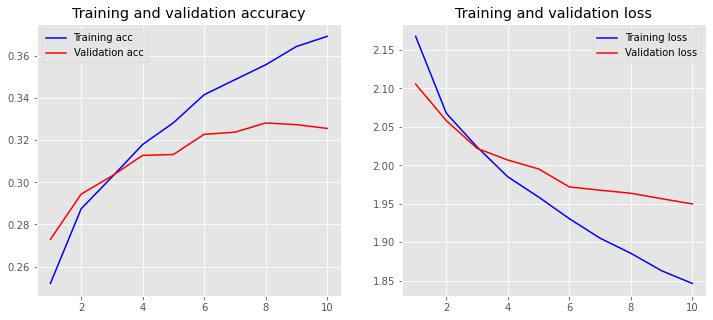

In [200]:
model8 = Sequential()
model8.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model8.add(layers.GlobalMaxPool1D())
model8.add(layers.Dense(1000, activation='relu'))
model8.add(layers.Dense(13, activation='softmax'))
model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model8)

In [ ]:
predict(model8, text)

le model le plus performant ici c'est avec trainable=True, nombre de neurones pour la première couche = 1000, optimizer = "adam" et en utilisant GlobalMaxPool1D()

# Réseaux de neurones convolutifs (CNN) (Convolutional Neural Networks)

In [187]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_58 (Embedding)     (None, 100, 100)          4899800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_38 (Glo (None, 128)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_138 (Dense)            (None, 13)                1313      
Total params: 4,978,141
Trainable params: 4,978,141
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
30/30 [==============================] - 102s 3s/step - loss: 2.3965 - accuracy: 0.1943 - val_loss: 2.1474 - val_accuracy: 0.2608
Epoch 2/10
30/30 [==============================] - 100s 3s/step - loss: 2.1183 - accuracy: 0.2668 - val_loss: 2.0702 - val_accuracy: 0.2790
Epoch 3/10
30/30 [==============================] - 94s 3s/step - loss: 2.0031 - accuracy: 0.3129 - val_loss: 1.9657 - val_accuracy: 0.3268
Epoch 4/10
30/30 [==============================] - 97s 3s/step - loss: 1.8632 - accuracy: 0.3800 - val_loss: 1.9223 - val_accuracy: 0.3481
Epoch 5/10
30/30 [==============================] - 94s 3s/step - loss: 1.7519 - accuracy: 0.4226 - val_loss: 1.9150 - val_accuracy: 0.3509
Epoch 6/10
30/30 [==============================] - 92s 3s/step - loss: 1.6671 - accuracy: 0.4570 - val_loss: 1.9352 - val_accuracy: 0.3530
Epoch 7/10
30/30 [==============================] - 92s 3s/step - loss: 1.5517 - accuracy: 0.5051 - val_loss: 1.9772 - val_accuracy: 0.3492
Epoch 8/10
30/30 [

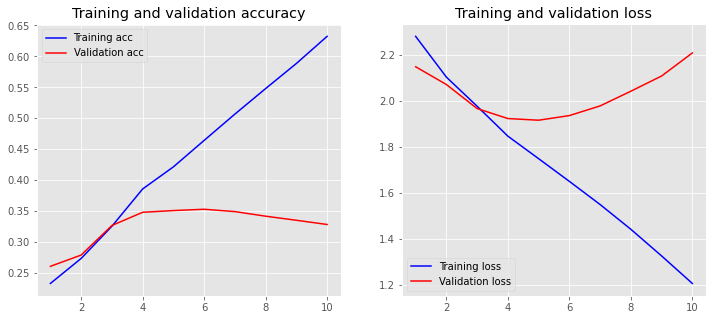

In [188]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 922.4497883319855 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.693367,0.3193,0.173705,0.169459,0.0,0.0,0.0,0.0,0.065744,0.342857,0.245473,0.376574,0.398227,0.0,0.293008,0.076923,0.353014


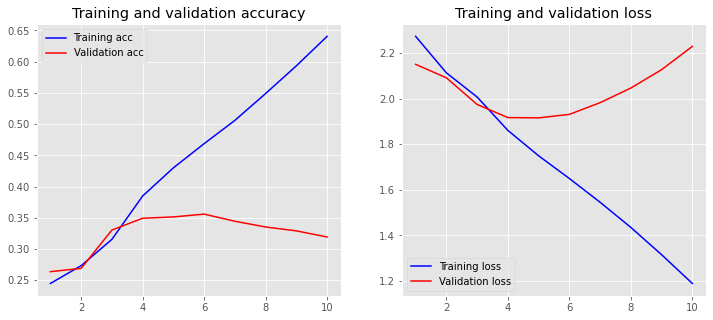

In [189]:
model9 = Sequential()
model9.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model9.add(layers.Conv1D(128, 5, activation='relu'))
model9.add(layers.GlobalMaxPooling1D())
model9.add(layers.Dense(100, activation='relu'))
model9.add(layers.Dense(13, activation='softmax'))
model9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model9)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 1571.9688031673431 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.680733,0.3222,0.191783,0.171687,0.0,0.0,0.0,0.0,0.021459,0.318199,0.274583,0.391148,0.404562,0.008989,0.281455,0.104197,0.356295


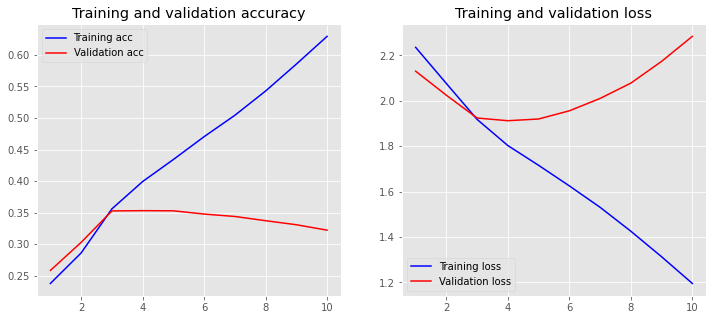

In [190]:
model10 = Sequential()
model10.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model10.add(layers.Conv1D(328, 5, activation='relu'))
model10.add(layers.GlobalMaxPooling1D())
model10.add(layers.Dense(100, activation='relu'))
model10.add(layers.Dense(13, activation='softmax'))
model10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model10)

/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time = 3174.9099020957947 secondes


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.7098,0.3072,0.176851,0.16571,0.0,0.0,0.0,0.0,0.074074,0.301348,0.255692,0.347874,0.397686,0.044,0.261991,0.100125,0.353325


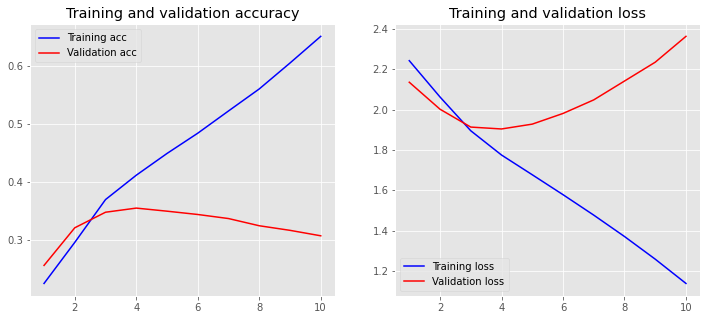

In [191]:
model10 = Sequential()
model10.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model10.add(layers.Conv1D(528, 5, activation='relu'))
model10.add(layers.GlobalMaxPooling1D())
model10.add(layers.Dense(100, activation='relu'))
model10.add(layers.Dense(13, activation='softmax'))
model10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model10)

Time = 2632.3267393112183 secondes


/home/ines/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy_train,accuracy_test,precision,recall,f1_happiness,f1_sadness,f1_anger,f1_worry,f1_love,f1_surprise,f1_fun,f1_relief,f1_empty,f1_enthusiasm,f1_boredom,f1_hate,f1_neutral
metrics,0.742667,0.3097,0.184205,0.16739,0.0,0.0,0.009569,0.0,0.040367,0.347826,0.242188,0.373881,0.386544,0.016771,0.288973,0.070732,0.335958


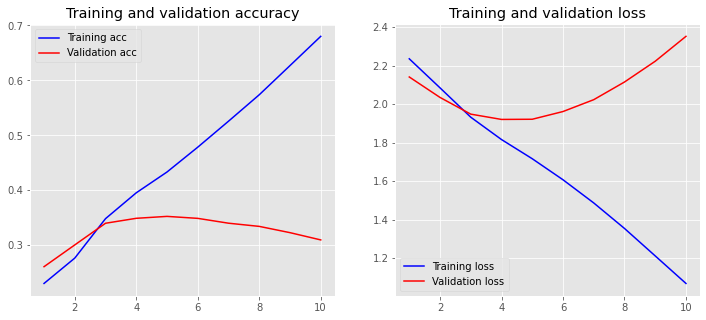

In [192]:
model11 = Sequential()
model11.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model11.add(layers.Conv1D(328, 10, activation='relu'))
model11.add(layers.GlobalMaxPooling1D())
model11.add(layers.Dense(100, activation='relu'))
model11.add(layers.Dense(13, activation='softmax'))
model11.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
classification_report(model11)

# Optimisation des hyperparamètres

In [94]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(13, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [95]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [96]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

epochs = 10

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=1000,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 54.8min finished


accuracy_test =  0.218299999833107
best socre =  0.24219999834895134
best param =  {'vocab_size': 5000, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
